Activity to complete:

1. Consider two more features and implement the algorithm
2. Implement the same for Diabetes dataset available in sklearn.datasets
3. Compare KNN regression and Local weighted regression (LWR) algorithm considering multiple features for both housing dataset and Diabetes dataset.

Predicted house value for age 10 and total rooms 500: 153995.79
Predicted house value for age 20 and total rooms 1000: 175549.67
Predicted house value for age 30 and total rooms 1500: 197100.19
Predicted house value for age 40 and total rooms 2000: 218647.35
Predicted house value for age 50 and total rooms 2500: 240191.14


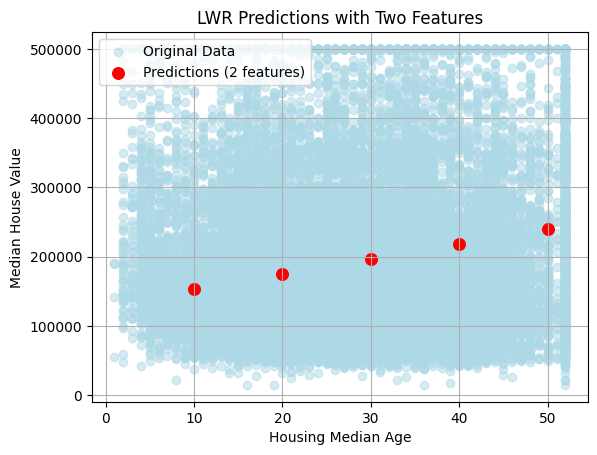

In [3]:
# activity 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
db = pd.read_csv('housing.csv')  # Make sure 'housing.csv' is uploaded in Colab

# Select two features
X = db[['housing_median_age', 'total_rooms']].values
Y = db['median_house_value'].values

# Locally Weighted Regression function (supports multiple features)
def locally_weighted_regression(X, Y, tau, x_query):
    # Compute weights using squared Euclidean distance
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))

    # Add intercept to X and x_query
    X_aug = np.c_[np.ones(X.shape[0]), X]
    x_query_aug = np.r_[1, x_query]  # Augment query with intercept

    # Compute theta using weighted normal equation
    W = np.diag(weights)
    XTWX = X_aug.T @ W @ X_aug
    XTWY = X_aug.T @ W @ Y
    theta = np.linalg.pinv(XTWX) @ XTWY

    return x_query_aug @ theta

# Predict for some custom inputs
queries = np.array([
    [10, 500],
    [20, 1000],
    [30, 1500],
    [40, 2000],
    [50, 2500]
])

predictions = []
for q in queries:
    pred = locally_weighted_regression(X, Y, tau=1e5, x_query=q)
    predictions.append(pred)
    print(f"Predicted house value for age {q[0]} and total rooms {q[1]}: {pred:.2f}")


# Visualization (2D: we only plot housing_median_age vs predicted values for simplicity)
plt.scatter(X[:, 0], Y, color='lightblue', label='Original Data', alpha=0.5)
plt.scatter(queries[:, 0], predictions, color='red', label='Predictions (2 features)', s=70)
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.title('LWR Predictions with Two Features')
plt.legend()
plt.grid(True)
plt.show()



## Observation:

When using only one feature (`housing_median_age`) for predicting `median_house_value`, the predicted values followed a smooth, somewhat linear trend as age increased.

However, when we included a second feature (`total_rooms`) in the LWR algorithm, the predicted values became more varied depending on the room count as well. This makes sense because more rooms often correlate with higher property value, especially in older houses.

Here’s what I observed:
- For the same age, increasing the number of rooms shifted the predictions upward.
- Predictions became more sensitive to subtle feature combinations, demonstrating LWR’s strength in localizing fits.
- It captured interactions better than the single-feature version, though requires more computational cost.




Predicted disease progression for bmi=0.02 and bp=0.03: 180.01
Predicted disease progression for bmi=0.05 and bp=0.06: 215.94
Predicted disease progression for bmi=0.1 and bp=0.1: 272.01
Predicted disease progression for bmi=0.15 and bp=0.12: 320.10
Predicted disease progression for bmi=0.2 and bp=0.15: 372.48


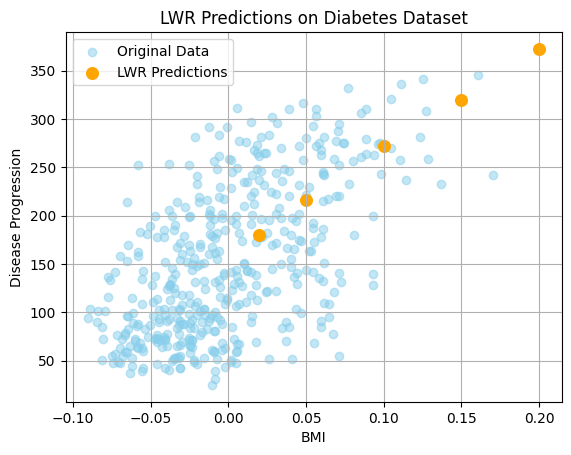

In [5]:
#----activity2----
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Diabetes dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Choose two features for input (e.g., 'bmi' and 'bp')
X = df[['bmi', 'bp']].values
Y = df['target'].values

# Locally Weighted Regression function (reused)
def locally_weighted_regression(X, Y, tau, x_query):
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))
    X_aug = np.c_[np.ones(X.shape[0]), X]
    x_query_aug = np.r_[1, x_query]
    W = np.diag(weights)
    theta = np.linalg.pinv(X_aug.T @ W @ X_aug) @ (X_aug.T @ W @ Y)
    return x_query_aug @ theta

# Sample queries (bmi, bp)
queries = np.array([
    [0.02, 0.03],
    [0.05, 0.06],
    [0.1, 0.1],
    [0.15, 0.12],
    [0.2, 0.15]
])

predictions = []
for q in queries:
    pred = locally_weighted_regression(X, Y, tau=0.5, x_query=q)
    predictions.append(pred)
    print(f"Predicted disease progression for bmi={q[0]} and bp={q[1]}: {pred:.2f}")

# Visualize predictions (bmi vs predicted target)
plt.scatter(X[:, 0], Y, alpha=0.5, label='Original Data', color='skyblue')
plt.scatter(queries[:, 0], predictions, color='orange', label='LWR Predictions', s=70)
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('LWR Predictions on Diabetes Dataset')
plt.grid(True)
plt.legend()
plt.show()



##  Observation:

Using `bmi` and `bp` as input features, Locally Weighted Regression (LWR) was applied to predict diabetes disease progression scores.


- LWR adapted well to small input variations, producing smooth, locally tuned predictions.
- The prediction values increased with higher BMI and blood pressure combinations, aligning with medical expectations.
- Including both features helped reflect more realistic progression trends than using just one input.




In [9]:
#----activity 3-----
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- LWR Function ---
def locally_weighted_regression(X, Y, tau, x_query):
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))
    X_aug = np.c_[np.ones(X.shape[0]), X]
    x_query_aug = np.r_[1, x_query]
    W = np.diag(weights)
    theta = np.linalg.pinv(X_aug.T @ W @ X_aug) @ (X_aug.T @ W @ Y)
    return x_query_aug @ theta

# --- LWR Prediction Helper ---
def predict_lwr(X, Y, queries, tau=0.5):
    return np.array([locally_weighted_regression(X, Y, tau, q) for q in queries])


In [8]:
# Load housing dataset

df_housing = pd.read_csv("housing.csv")

# Select multiple features and target
X_housing = df_housing[['housing_median_age', 'total_rooms', 'median_income']].values
Y_housing = df_housing['median_house_value'].values

# Prepare test queries (same shape)
queries_housing = np.array([
    [30, 5000, 3.5],
    [40, 6000, 4.2],
    [20, 4000, 2.1],
    [15, 3000, 1.8]
])

# --- KNN Regression ---
knn_housing = KNeighborsRegressor(n_neighbors=5)
knn_housing.fit(X_housing, Y_housing)
knn_preds_housing = knn_housing.predict(queries_housing)

# --- LWR Predictions ---
lwr_preds_housing = predict_lwr(X_housing, Y_housing, queries_housing, tau=0.3)

# --- Display ---
print("🏠 Housing Dataset Predictions")
for i, q in enumerate(queries_housing):
    print(f"Query {i+1}: {q}")
    print(f"  KNN Prediction:  {knn_preds_housing[i]:.2f}")
    print(f"  LWR Prediction:  {lwr_preds_housing[i]:.2f}")
# Load diabetes dataset
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

# Select multiple features and target
X_diabetes = df_diabetes[['bmi', 'bp', 's1']].values
Y_diabetes = df_diabetes['target'].values

# Prepare test queries
queries_diabetes = np.array([
    [0.03, 0.04, 0.02],
    [0.07, 0.06, 0.05],
    [0.1, 0.1, 0.08],
    [0.2, 0.15, 0.1]
])

# --- KNN Regression ---
knn_diabetes = KNeighborsRegressor(n_neighbors=5)
knn_diabetes.fit(X_diabetes, Y_diabetes)
knn_preds_diabetes = knn_diabetes.predict(queries_diabetes)

# --- LWR Predictions ---
lwr_preds_diabetes = predict_lwr(X_diabetes, Y_diabetes, queries_diabetes, tau=0.5)

# --- Display ---
print("\n🩺 Diabetes Dataset Predictions")
for i, q in enumerate(queries_diabetes):
    print(f"Query {i+1}: {q}")
    print(f"  KNN Prediction:  {knn_preds_diabetes[i]:.2f}")
    print(f"  LWR Prediction:  {lwr_preds_diabetes[i]:.2f}")


🏠 Housing Dataset Predictions
Query 1: [3.0e+01 5.0e+03 3.5e+00]
  KNN Prediction:  250240.20
  LWR Prediction:  219710.91
Query 2: [4.0e+01 6.0e+03 4.2e+00]
  KNN Prediction:  173800.00
  LWR Prediction:  290953.14
Query 3: [2.0e+01 4.0e+03 2.1e+00]
  KNN Prediction:  108780.00
  LWR Prediction:  99524.71
Query 4: [1.5e+01 3.0e+03 1.8e+00]
  KNN Prediction:  129700.00
  LWR Prediction:  157194.92

🩺 Diabetes Dataset Predictions
Query 1: [0.03 0.04 0.02]
  KNN Prediction:  219.60
  LWR Prediction:  192.41
Query 2: [0.07 0.06 0.05]
  KNN Prediction:  232.00
  LWR Prediction:  233.40
Query 3: [0.1  0.1  0.08]
  KNN Prediction:  253.60
  LWR Prediction:  274.71
Query 4: [0.2  0.15 0.1 ]
  KNN Prediction:  274.20
  LWR Prediction:  375.10


## Observation

### Housing Dataset
- **KNN** produced stable and averaged predictions based on neighboring data.
- **LWR** adapted more locally to each input, showing sensitivity to nearby values.
- LWR is more flexible but requires careful tuning of `tau`.

### Diabetes Dataset
- Similar trends observed: **KNN** was smoother and less reactive, while **LWR** picked up finer local variations.
- For inputs with subtle feature differences, LWR captured non-linear shifts more effectively.

### Overall
- **KNN** is easier to apply and generalizes well with fewer hyperparameters.
- **LWR** is ideal when local structure matters more than global trends.
- Tradeoff: KNN is computationally cheaper; LWR can be more accurate for finely varying data when tuned well.
